In [2]:
import dash 
from dash import Dash,dcc,html,callback,Input,Output, Patch, clientside_callback, callback
import plotly.io as pio
from dash_bootstrap_templates import load_figure_template

import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import Figure as fig
import pages as pag
import Functions_dash as Fun

C:\Users\Alex\Documents\yanis\cours\Master ssd\M1\Semestre_2\Visualisations\Figure.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("age_group").size()
C:\Users\Alex\Documents\yanis\cours\Master ssd\M1\Semestre_2\Visualisations\Figure.py:377: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### 2)

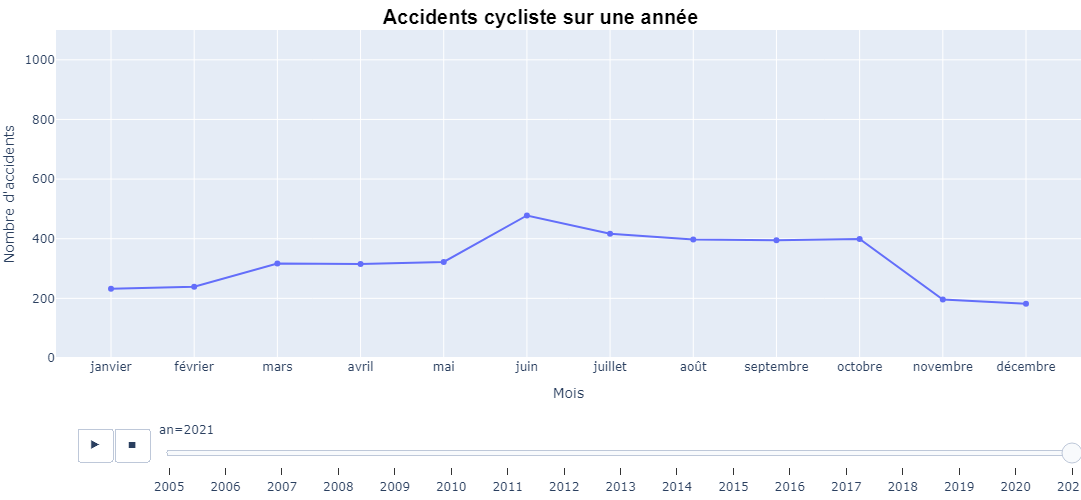

In [3]:
fig.fig2("x8")

In [7]:
# Définissez les intervalles et les labels
bins = [0, 18, 30, 50, float('inf')]
labels = ['Moins de 18 ans', 'Entre 18 et 30 ans', 'Entre 30 et 50 ans', 'Plus de 50 ans']

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

data.groupby("age_group").size()


C:\Users\Alex\AppData\Local\Temp\ipykernel_8156\3331614574.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



age_group
Moins de 18 ans       17678
Entre 18 et 30 ans    19127
Entre 30 et 50 ans    25210
Plus de 50 ans        31691
dtype: int64

In [3]:
import numpy as np
data= pd.read_csv("accidents-velos_clean.csv",low_memory=False)
data = data.drop(data[data['sexe']=='-1'].index)
regions_name= pd.read_csv("departements-region.csv")
data= pd.merge(data, regions_name[['num_dep','region_name']], left_on='dep', right_on='num_dep',how='right')
# on ordonne la variable mois pour avoir une année dans l'ordre
mois_ordre = ['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre']
# Conversion de la variable 'mois' en facteur ordonnné
data['mois'] = pd.Categorical(data['mois'], categories=mois_ordre, ordered=True)
data['situ'] = data['situ'].replace(['Non renseigné', 'Aucun','Autres','Sur autre voie spéciale'], 'Autres')
# Définissez les intervalles et les labels
bins = [0, 18, 30, 50, float('inf')]
# ajout d'une variable age catégorielle
labels = ['Moins de 18 ans', 'Entre 18 et 30 ans', 'Entre 30 et 50 ans', 'Plus de 50 ans']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
data.groupby("age_group").size()

# on crée un vecteur avec les années triés dans l'ordre
mod = data["an"].unique()
mod.sort()
# on rajoute "all"
mod_year = ["all"] + mod.tolist()

C:\Users\Alex\AppData\Local\Temp\ipykernel_13588\3871158585.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [13]:
def fig2(speed_animation):
    #accidents_par_annee_mois = data.groupby(['an','mois']).size().reset_index(name = 'Nombre_d_accidents')
    accidents_par_annee_mois = data.groupby(['an','mois','region_name']).size().reset_index(name = 'Nombre_d_accidents')
    fig2 = px.line(accidents_par_annee_mois, x="mois", y="Nombre_d_accidents",color="region_name", 
                  markers=True,animation_frame="an"
                 ,custom_data=['an','mois','Nombre_d_accidents'])
    # taille de la figure (largeur, hauteur)
    fig2.update_layout(width=800, height=500)
    #  ajout titre et axes
    fig2.update_layout(
                      xaxis_title="Mois",
                      yaxis_title="Nombre d'accidents"
                     )
    # la vitese d'animation
    if speed_animation=="x8":
        fig2.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500/8
    elif speed_animation=="x4":
        fig2.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500/4
    elif speed_animation=="x2":
        fig2.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 750
    elif speed_animation=="x1.5":
        fig2.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
    else:
        fig2.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500
    
    # changer l'echelle des ordonnées
    fig2.update_yaxes(range=[0, 150])
    
    # Titre
    fig2.update_layout(margin = {"r":0,"t":30,"l":0,"b":0},
                     title={
            'text': "<b>Accidents cycliste sur une année</b>",
            'y': 0.98,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': {'size': 20,'family': 'Arial, sans-serif', 'color': 'black'} 
        })
    
    # Personnalisation du popup
    fig2.update_traces(hovertemplate="<br>".join(["Année : %{customdata[0]}",
                                                 "Mois : %{customdata[1]}",
                                                 "Nombre d'accidents : %{customdata[2]}"
                                                 ]),selector= 0)
    
    return fig2

C:\Users\Alex\AppData\Local\Temp\ipykernel_13588\1584663474.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



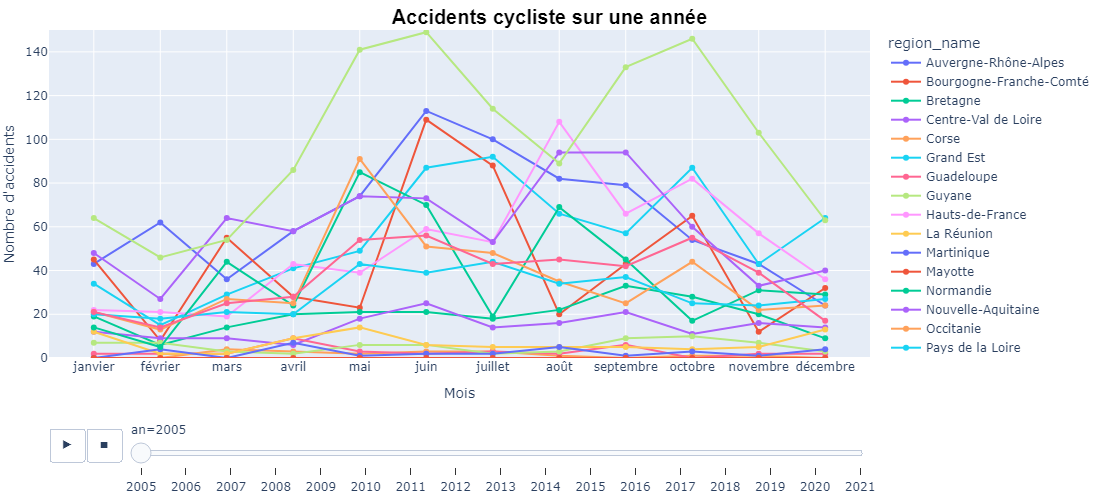

In [14]:
fig2("normal")

# Notre appli

In [1]:
import dash
import dash_bootstrap_components as dbc
from dash import Dash,dcc,html,callback,Input,Output, Patch, clientside_callback, callback
import plotly.io as pio
from dash_bootstrap_templates import load_figure_template
import pandas as pd 
import plotly.express as px
import Functions_dash as Fun
import Figure as fig
import pages as pag
from PIL import Image
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

app = dash.Dash(
    external_stylesheets=[dbc.themes.BOOTSTRAP, dbc.icons.FONT_AWESOME],suppress_callback_exceptions=True
)

# Bar noir en haut de page
navbar = dbc.NavbarSimple(
    children=[
        dbc.Button("Menu", outline=True, color="secondary", className="mr-1", id="btn_sidebar"), # Bouton pour le menu
        dbc.Popover(
                    "CLiquez pour ranger/sortir le sidebar",
                    target='btn_sidebar',
                    trigger="hover",
                    placement = "bottom"
                 ),
    ],
    brand="",
    brand_href="#",
    color="dark",
    dark=True,
    fluid=True,
    links_left= True,
)


submenu_1 = [
    html.Li(
        # use Row and Col components to position the chevrons
        dbc.Row(
            [
                dbc.Col("Visualisations"),
                dbc.Col(
                    html.I(className="fas fa-chevron-right me-3"),
                    width="auto",
                ),
            ],
            className="my-1",
        ),
        style={"cursor": "pointer"},
        id="submenu-1",
    ),
    # we use the Collapse component to hide and reveal the navigation links
    dbc.Collapse(
        [
            dbc.NavLink("Evolution temporelle", href="/page-1/1"),
            dbc.NavLink("Caractéristiques des accidents", href="/page-1/2"),
        ],
        id="submenu-1-collapse",
    ),
]

submenu_2 = [
    html.Li(
        dbc.Row(
            [
                dbc.Col("Cartes interactives"),
                dbc.Col(
                    html.I(className="fas fa-chevron-right me-3"),
                    width="auto",
                ),
            ],
            className="my-1",
        ),
        style={"cursor": "pointer"},
        id="submenu-2",
    ),
    dbc.Collapse(
        [
            dbc.NavLink("Carte de la France", href="/page-map"),
            dbc.NavLink("Page 2.2", href="/page-2/2"),
        ],
        id="submenu-2-collapse",
    ),
]


sidebar = html.Div(
    [
        html.H2("DashBike", className="display-4"),
        html.Hr(),
        html.Img(src = Image.open("accident_bike.png"),style={"width": "60%",
                                                             "margin-bottom": '10%'}),
        html.P(
            "Vous trouverez ici les différentes pages du dashboard", className="lead"
        ),
        dbc.Nav(submenu_1 + submenu_2, vertical=True,pills=True),
        html.Img(src=Image.open("roue.png"),style={"width": "60%",
                                                  "margin-top": '140%'}),
    ],
    style=fig.SIDEBAR_STYLE,
    id="sidebar",
)


content = html.Div(id="page-content", style=fig.CONTENT_STYLE)

app.layout = html.Div(
    [
        dcc.Store(id='side_click'),
        dcc.Location(id="url"),
        navbar,
        sidebar,
        content,
    ],
)



# Fonction qui appel toute les fonctions callback qui sont dans le fichier Fonction_dash.py
Fun.get_callbacks(app)

if __name__ == "__main__":
    app.run_server(debug=True,jupyter_mode="external")

C:\Users\Alex\Documents\yanis\cours\Master ssd\M1\Semestre_2\Visualisations\Figure.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("age_group").size()
C:\Users\Alex\Documents\yanis\cours\Master ssd\M1\Semestre_2\Visualisations\Figure.py:377: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Dash app running on http://127.0.0.1:8050/
